1).Problem Statement

In [ ]:
%cd ""

In [4]:
%pwd

'c:\\Users\\Cristal info\\BigMart Product Outlet Sales Analysis and Prediction\\BigMart-Product-Outlet-Sales-Analysis-and-Prediction\\notebooks'

In [10]:
%run 'C:/Users/Cristal info/BigMart Product Outlet Sales Analysis and Prediction/BigMart-Product-Outlet-Sales-Analysis-and-Prediction/src/unzip_file.py'

Exception: File `"'C:/Users/Cristal.py"` not found.

2).Hypothesis Generation

3).Loading Packages and Data

In [35]:
# Importing packages
import pandas as pd
import zipfile
import seaborn as sns

In [4]:
# path to the zip file
path_data = "data.zip"

# open and read zip file
with zipfile.ZipFile(path_data, 'r') as my_zip:
    # get a list of the files in the zip archive
    files_in_zip = my_zip.namelist()

    # read the first file in the zip archive into a variable named Data_train
    Data_train = pd.read_csv(my_zip.open(files_in_zip[1]))

    # read the second file in the zip archive into a dataframe named Data_test
    Data_test = pd.read_csv(my_zip.open(files_in_zip[0]))


In [4]:
print("Data_train:", Data_train.shape)
print("Data_test:", Data_test.shape)

Data_train: (8523, 12)
Data_test: (5681, 11)


In [4]:
Data_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [5]:
Data_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


4).Data Structure and Content

In [5]:
Data_train_copy = Data_train.copy()

In [68]:
print("Data_train:", Data_train_copy.shape)
print("Data_test:", Data_train_copy.shape)

Data_train: (8523, 12)
Data_test: (8523, 12)


In [7]:
# Getting the columns of the Datat_train
print(Data_train_copy.columns)
num_cols = Data_train_copy.shape[1]
print("Number of columns:", num_cols)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')
Number of columns: 12


In [8]:
# Getting global information about our data
Data_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
# We can notice from the description of our data structure that it contains missing values and different types of data.

In [10]:
Data_train_copy.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [11]:
# get the first 5 rows of the data frame
Data_train_copy.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


5).Exploratory Data Analysis

In this step data visualization is done.

In [6]:
# Check for missing values
Data_train_copy.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
# The missing values are present in two columns: Item_Weight and Outlet_Weight.

In [7]:
# TODO: Since it only has a small number of missing values, one option is to fill those missing values with the mean
Data_train_copy['Item_Weight'].fillna(Data_train_copy['Item_Weight'].mean(), inplace=True)

In [8]:
# TODO: here we have used the mode (most frequent value) to deal with missing values since have more missing values
Data_train_copy['Outlet_Size'].fillna(Data_train_copy['Outlet_Size'].mode()[0], inplace=True)

In [9]:
# Check for missing values
Data_train_copy.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [10]:
# Check for duplicate rows
duplicates = Data_train_copy.duplicated()
print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 0


In [ ]:
# It is good, we don't have duplicate rows.

We can use different techniques to detect outlier values in data. Here three common methods:
- IQR

In [11]:
# Using IQR method
Q1 = Data_train_copy.quantile(0.25)
Q3 = Data_train_copy.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (Data_train_copy < lower_bound) | (Data_train_copy > upper_bound)

print(outliers.sum())


Item_Fat_Content               0
Item_Identifier                0
Item_MRP                       0
Item_Outlet_Sales            186
Item_Type                      0
Item_Visibility              144
Item_Weight                    0
Outlet_Establishment_Year      0
Outlet_Identifier              0
Outlet_Location_Type           0
Outlet_Size                    0
Outlet_Type                    0
dtype: int64


C:\Users\Cristal info\AppData\Local\Temp\ipykernel_6616\3792989972.py:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (Data_train_copy < lower_bound) | (Data_train_copy > upper_bound)


In [18]:
# We notice that there are two features containing outlier values including Item_Identifier and Item_Outlet_Sales

6).Univariate Analysis

In [ ]:
# Univariate Analysis
# is a statistical method that involves the analysis of one variable at a time. It is used to describe the main features of a single variable, including its central tendency, dispersion, and shape of the distribution. Univariate analysis is used to identify the relationship between a dependent variable and an independent variable. It can be used to identify outliers, trends, and patterns in data, as well as to make predictions about future values. Common techniques used in univariate analysis include frequency distributions, histograms, measures of central tendency such as mean, median, and mode, measures of dispersion such as range, variance, and standard deviation, and graphical representations such as box plots and density plots. Univariate analysis is a useful tool for exploring and understanding data, but it has limitations, as it only considers one variable at a time and does not capture the relationships between variables.
# - Histogram
# - Boxplot
# - CharBar

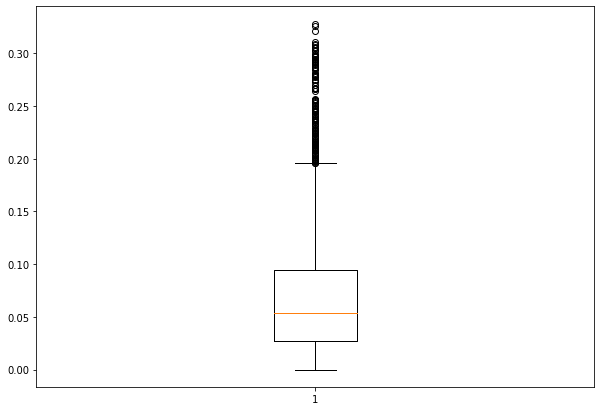

Mean:  0.06613202877895108
Std:  0.05159782232113512


In [12]:
import matplotlib.pyplot as plt

# Now you can use plt to create a plot or chart
var = Data_train_copy['Item_Visibility']
fig = plt.figure(figsize=(10,7))
plt.boxplot(var)
plt.show()

print("Mean: ", Data_train_copy['Item_Visibility'].mean())
print("Std: ",Data_train_copy['Item_Visibility'].std())

<AxesSubplot:xlabel='Item_Visibility'>

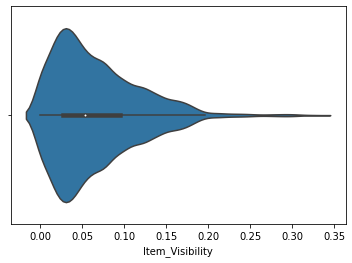

In [15]:
import seaborn as sns
sns.violinplot(data=Data_train_copy,x=Data_train_copy.Item_Visibility)

<AxesSubplot:xlabel='Item_Visibility'>

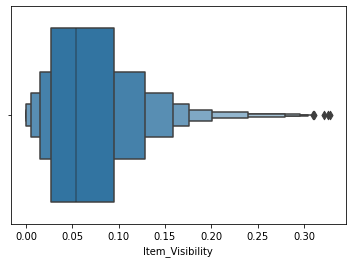

In [ ]:
sns.boxenplot(x=Data_train_copy.Item_Visibility)

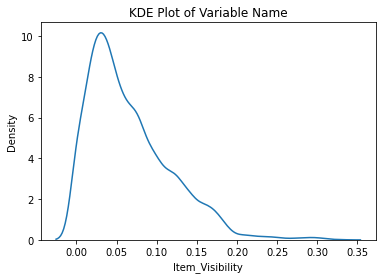

In [16]:
import seaborn as sns

sns.kdeplot(Data_train_copy['Item_Visibility'])
plt.xlabel('Item_Visibility')
plt.ylabel('Density')
plt.title('KDE Plot of Variable Name')
plt.show()


In [ ]:
# The most Item_Visibility values is in range [0,20], In this case, we remplace the outlier values with the mean values 

In [13]:
Data_train_copy['Item_Visibility'].unique

<bound method Series.unique of 0       0.016047
1       0.019278
2       0.016760
3       0.000000
4       0.000000
          ...   
8518    0.056783
8519    0.046982
8520    0.035186
8521    0.145221
8522    0.044878
Name: Item_Visibility, Length: 8523, dtype: float64>

In [ ]:
fig = plt.figure(figsize=(10,7))
sns.countplot(x=Data_train_copy['Item_Visibility'])
plt.xlabel('Item_Visibility')
plt.xticks(rotation=90)
plt.show()

7).Bivariate Analysis

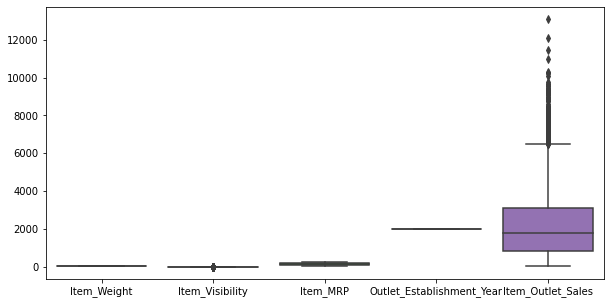

In [18]:
import seaborn as sns 
# plot the box plot for all features
plt.figure(figsize=(10,5)) #set the figsize to desired size
sns.boxplot(data=Data_train_copy)
plt.show()


Here we see that only the Item_Outlet_Sales has outliers values (This attribute is the label data)

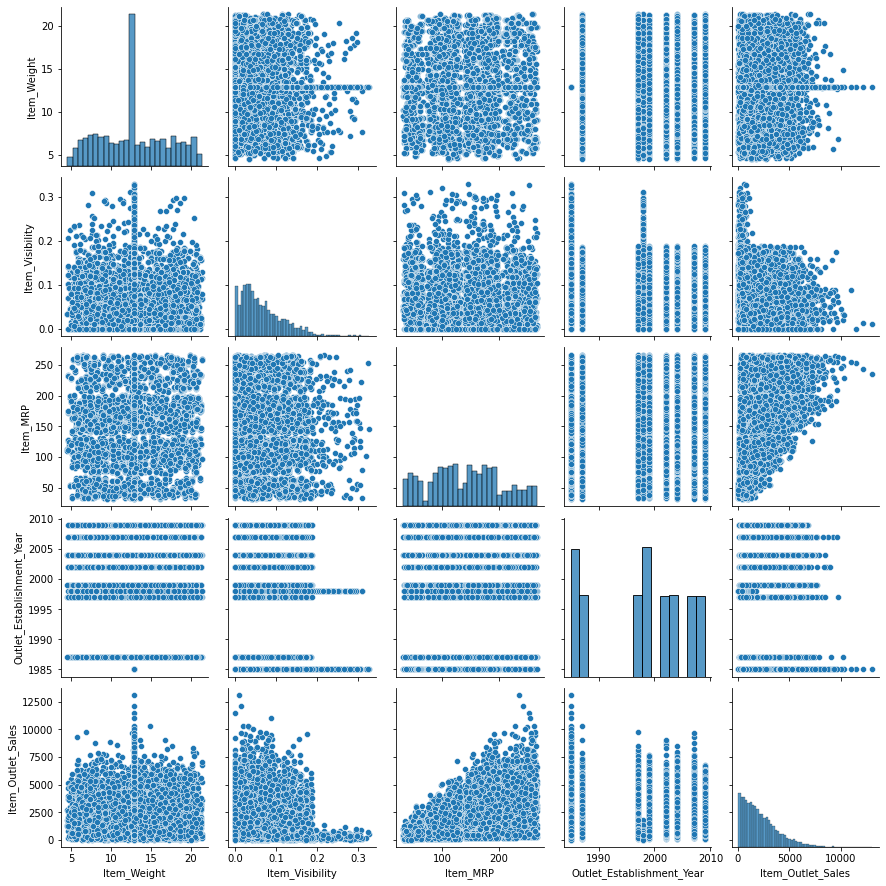

In [ ]:
import seaborn as sns
# Select only numerical data columns 
numeric_df = Data_train_copy.select_dtypes(include=['float64', 'int64'])
# Create pairplot using Seaborn
sns.pairplot(numeric_df)

Feature Engineering

Dealing with outlier values in the Item_visibility attribute

In [21]:

# Calculate the median and mean of the 'Item_Visibility' attribute
Visibility_median = Data_train_copy['Item_Visibility'].median()
Visibility_mean = Data_train_copy['Item_Visibility'].mean()

# Replace values that are greater than 3 standard deviations from the mean with the median
Outlier_std = (Data_train_copy['Item_Visibility'] - Visibility_mean).abs() > 3*Data_train_copy['Item_Visibility'].std()
Data_train_copy.loc[Outlier_std, 'Item_Visibility'] = Visibility_median 

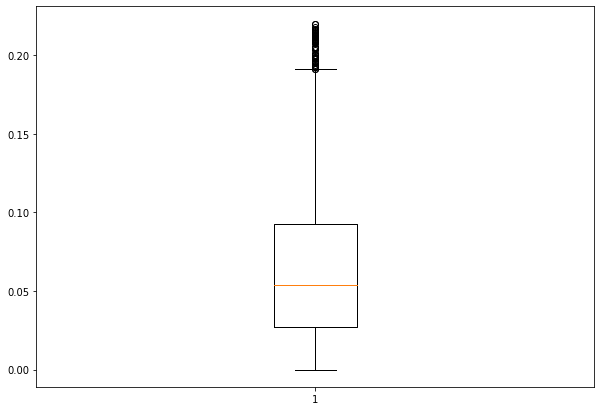

Mean:  0.06379357572228089
Std:  0.04704929788530718


In [22]:
# Now you can use plt to create a plot or chart
var = Data_train_copy['Item_Visibility']
fig = plt.figure(figsize=(10,7))
plt.boxplot(var)
plt.show()

print("Mean: ", Data_train_copy['Item_Visibility'].mean())
print("Std: ",Data_train_copy['Item_Visibility'].std())

<AxesSubplot:xlabel='Item_Visibility'>

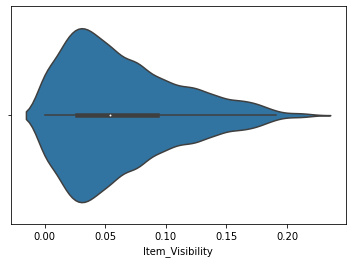

In [8]:
sns.violinplot(data=Data_train_copy,x=Data_train_copy.Item_Visibility)

Converting variables to numerical values

In [9]:
Data_train_copy.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [23]:
Data_train_copy.dtypes

Item_Identifier                int64
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Identifier              int64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
dtype: object

In [24]:

# Convert the object columns ('A' and 'C') to numerical values using factorize()
for col in Data_train_copy.select_dtypes(include='object'):
    Data_train_copy[col], _ = Data_train_copy[col].factorize()

# Print the updated data types of each column
print(Data_train_copy.dtypes)


Item_Identifier                int64
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Identifier              int64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
dtype: object


In [18]:
Data_train_copy

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,9.300,0,0.016047,0,249.8092,0,1999,0,0,0,3735.1380
1,1,5.920,1,0.019278,1,48.2692,1,2009,0,1,1,443.4228
2,2,17.500,0,0.016760,2,141.6180,0,1999,0,0,0,2097.2700
3,3,19.200,1,0.000000,3,182.0950,2,1998,0,1,2,732.3800
4,4,8.930,0,0.000000,4,53.8614,3,1987,1,1,0,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,359,6.865,0,0.056783,6,214.5218,3,1987,1,1,0,2778.3834
8519,1537,8.380,1,0.046982,5,108.1570,5,2002,0,2,0,549.2850
8520,354,10.600,0,0.035186,9,85.1224,8,2004,2,2,0,1193.1136
8521,908,7.210,1,0.145221,6,103.1332,1,2009,0,1,1,1845.5976


In [19]:
Data_train_copy.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,9.30,0,0.016047,0,249.8092,0,1999,0,0,0,3735.1380
1,1,5.92,1,0.019278,1,48.2692,1,2009,0,1,1,443.4228
2,2,17.50,0,0.016760,2,141.6180,0,1999,0,0,0,2097.2700
3,3,19.20,1,0.000000,3,182.0950,2,1998,0,1,2,732.3800
4,4,8.93,0,0.000000,4,53.8614,3,1987,1,1,0,994.7052


In [26]:
# creating new column contains the difference between the year and the min year of the ancien column
min_year = Data_train_copy['Outlet_Establishment_Year'].min()
Data_train_copy['year_diff'] = Data_train_copy['Outlet_Establishment_Year'].apply(lambda x: x - min_year)
Data_train_copy['year_diff'] 

0       14
1       24
2       14
3       13
4        2
        ..
8518     2
8519    17
8520    19
8521    24
8522    12
Name: year_diff, Length: 8523, dtype: int64

In [27]:
# drop out the ancien column from the dataframe
Data_train_copy.drop(columns=["Outlet_Establishment_Year"], inplace=True)

In [28]:
Data_train_copy

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,year_diff
0,0,9.300,0,0.016047,0,249.8092,0,0,0,0,3735.1380,14
1,1,5.920,1,0.019278,1,48.2692,1,0,1,1,443.4228,24
2,2,17.500,0,0.016760,2,141.6180,0,0,0,0,2097.2700,14
3,3,19.200,1,0.000000,3,182.0950,2,0,1,2,732.3800,13
4,4,8.930,0,0.000000,4,53.8614,3,1,1,0,994.7052,2
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,359,6.865,0,0.056783,6,214.5218,3,1,1,0,2778.3834,2
8519,1537,8.380,1,0.046982,5,108.1570,5,0,2,0,549.2850,17
8520,354,10.600,0,0.035186,9,85.1224,8,2,2,0,1193.1136,19
8521,908,7.210,1,0.145221,6,103.1332,1,0,1,1,1845.5976,24


In [49]:
Labels = Data_train.iloc[:,11]
Labels

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [47]:

Labels = Data_train_copy.iloc[:,10]
Labels

0       0.583333
1       1.000000
2       0.583333
3       0.541667
4       0.083333
          ...   
8518    0.083333
8519    0.708333
8520    0.791667
8521    1.000000
8522    0.500000
Name: year_diff, Length: 8523, dtype: float64

In [30]:
Data_train_copy

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,year_diff
0,0,9.300,0,0.016047,0,249.8092,0,0,0,0,3735.1380,14
1,1,5.920,1,0.019278,1,48.2692,1,0,1,1,443.4228,24
2,2,17.500,0,0.016760,2,141.6180,0,0,0,0,2097.2700,14
3,3,19.200,1,0.000000,3,182.0950,2,0,1,2,732.3800,13
4,4,8.930,0,0.000000,4,53.8614,3,1,1,0,994.7052,2
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,359,6.865,0,0.056783,6,214.5218,3,1,1,0,2778.3834,2
8519,1537,8.380,1,0.046982,5,108.1570,5,0,2,0,549.2850,17
8520,354,10.600,0,0.035186,9,85.1224,8,2,2,0,1193.1136,19
8521,908,7.210,1,0.145221,6,103.1332,1,0,1,1,1845.5976,24


In [31]:
Data_train_copy = Data_train_copy.astype(float)

In [39]:
# I used this code to change column indexes:
# Create a list of all column names
col_list = list(Data_train_copy.columns)

# Switch the positions of the last two columns
col_list[10], col_list[11] = col_list[11], col_list[10]

# Select columns with the new order
Data_train_copy = Data_train_copy[col_list]

<AxesSubplot:>

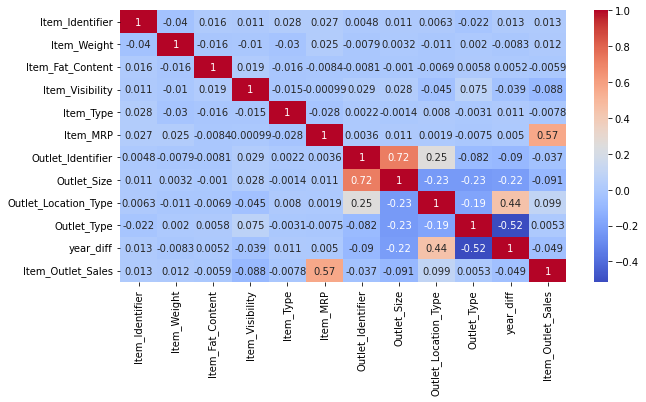

In [40]:

# Calculate pairwise correlation of columns
correlation_matrix = Data_train_copy.corr()

plt.figure(figsize=(10,5)) #set the figsize to desired size
# Plot the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


In [38]:
Data_train_copy.dtypes

Item_Identifier         float64
Item_Weight             float64
Item_Fat_Content        float64
Item_Visibility         float64
Item_Type               float64
Item_MRP                float64
Outlet_Identifier       float64
Outlet_Size             float64
Outlet_Location_Type    float64
Outlet_Type             float64
Item_Outlet_Sales       float64
year_diff               float64
dtype: object

In [41]:
# drop out the ancien column from the dataframe
Data_train_copy.drop(columns=["Item_Outlet_Sales"], inplace=True)

Scaling data

In [42]:
from sklearn.preprocessing import MinMaxScaler

# Get only the numerical columns and store them into a new dataframe called df_numerical
df_numerical = Data_train_copy.select_dtypes(include=['int64', 'float64'])

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the data in df_numerical using the fit_transform() method of scaler and store it in X_scaled
X_scaled = scaler.fit_transform(df_numerical.values)

# Replace the values in the original dataframe (Data_train_copy) with the scaled values
Data_train_copy[df_numerical.columns] = X_scaled


- Decision Tree Regressor

In [43]:

Data_train_copy.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,year_diff
0,0.000000,0.282525,0.00,0.072868,0.000000,0.927507,0.000000,0.0,0.0,0.000000,0.583333
1,0.000642,0.081274,0.25,0.087538,0.066667,0.072068,0.111111,0.0,0.5,0.333333,1.000000
2,0.001284,0.770765,0.00,0.076104,0.133333,0.468288,0.000000,0.0,0.0,0.000000,0.583333
3,0.001926,0.871986,0.25,0.000000,0.200000,0.640093,0.222222,0.0,0.5,0.666667,0.541667
4,0.002567,0.260494,0.00,0.000000,0.266667,0.095805,0.333333,0.5,0.5,0.000000,0.083333


<AxesSubplot:>

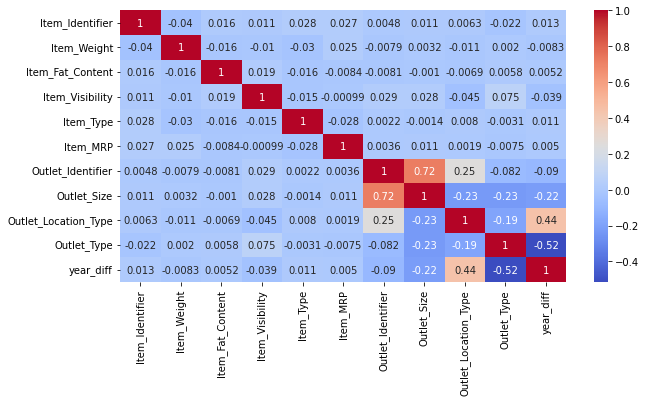

In [44]:
# Calculate pairwise correlation of columns
correlation_matrix = Data_train_copy.corr()

plt.figure(figsize=(10,5)) #set the figsize to desired size
# Plot the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

In [52]:
Labels.dtype

dtype('float64')

Training models

- RandomForestRegressor

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


X_train, X_test, y_train, y_test = train_test_split(Data_train_copy, Labels, test_size=0.2, random_state=42)

# create a Random Forest regressor object
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# train the model on the training data
rf.fit(X_train, y_train)

# predict the target values for the test data
predictions = rf.predict(X_test)



In [60]:
# Calculate mean squared error (MSE) to assess model accuracy
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 1173237.2798282765


In [63]:
from sklearn.metrics import r2_score
print("Accuracy: ",r2_score(y_test, predictions))

Accuracy:  0.56834061778734


- GradientBoostingRegressor

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor


# Train a Gradient Boosting Regressor model
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

# Predict on test set
y_pred = gbr.predict(X_test)

# Calculate mean squared error (MSE) to assess model accuracy
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")


Mean Squared Error (MSE): 1074701.9196929913


In [61]:
from sklearn.metrics import r2_score
print("Accuracy: ",r2_score(y_test, y_pred))

Accuracy:  0.6045939089274961


- MLPRegressor

In [64]:
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor

# Initializing the ANN regressor
ann_regressor = MLPRegressor(hidden_layer_sizes=(100, 50, 25), max_iter=100)

# Training the ANN regressor
ann_regressor.fit(X_train, y_train)

# Making predictions on the test set
y_pred = ann_regressor.predict(X_test)

# Calculating R-squared score on the test set
accuracy = r2_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6124673250730404


c:\Users\Cristal info\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


- Decision Tree Regressor

In [65]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Creating an instance of the DecisionTreeRegressor and fitting the model on the training data
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

# Using the trained model to make predictions on the test set
y_pred = regressor.predict(X_test)

# Calculating the R-squared score (coefficient of determination) as a measure of model accuracy
r2 = r2_score(y_test, y_pred)
print("R-Squared Score: ", r2)


R-Squared Score:  0.1882825338991041


- Support Vector Regressor

In [66]:
# import required libraries
import pandas as pd # data manipulation
from sklearn.model_selection import train_test_split # data splitting
from sklearn.svm import SVR # support vector regression
from sklearn.metrics import r2_score #accuracy

# Apply SVR 
svr = SVR(kernel='linear')  # or choose other types of kernel
svr.fit(X_train , y_train)

# Predict values using the SVR model
y_pred = svr.predict(X_test)

# Calculate accuracy using R-squared metric
accuracy = r2_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.10788305704536527


# Feature selection

In this section, I will use the feature selection methods in order to improve the performance of the model.

In [ ]:
Data_train_copy = Data_train_copy.drop(['Item_Outlet_Sales'], axis=1)


In [89]:
Data_train_copy

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,year_diff
0,0.000000,0.282525,0.00,0.072868,0.000000,0.927507,0.000000,0.0,0.0,0.000000,0.583333
1,0.000642,0.081274,0.25,0.087538,0.066667,0.072068,0.111111,0.0,0.5,0.333333,1.000000
2,0.001284,0.770765,0.00,0.076104,0.133333,0.468288,0.000000,0.0,0.0,0.000000,0.583333
3,0.001926,0.871986,0.25,0.000000,0.200000,0.640093,0.222222,0.0,0.5,0.666667,0.541667
4,0.002567,0.260494,0.00,0.000000,0.266667,0.095805,0.333333,0.5,0.5,0.000000,0.083333
...,...,...,...,...,...,...,...,...,...,...,...
8518,0.230424,0.137541,0.00,0.257842,0.400000,0.777729,0.333333,0.5,0.5,0.000000,0.083333
8519,0.986521,0.227746,0.25,0.213338,0.333333,0.326263,0.555556,0.0,1.0,0.000000,0.708333
8520,0.227214,0.359929,0.00,0.159774,0.600000,0.228492,0.888889,1.0,1.0,0.000000,0.791667
8521,0.582798,0.158083,0.25,0.659418,0.400000,0.304939,0.111111,0.0,0.5,0.333333,1.000000


In [90]:
# Chi-square require labeled data

Data_train_copy = pd.concat([Data_train_copy, Labels], axis=1)
Data_train_copy

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,year_diff,Item_Outlet_Sales
0,0.000000,0.282525,0.00,0.072868,0.000000,0.927507,0.000000,0.0,0.0,0.000000,0.583333,3735.1380
1,0.000642,0.081274,0.25,0.087538,0.066667,0.072068,0.111111,0.0,0.5,0.333333,1.000000,443.4228
2,0.001284,0.770765,0.00,0.076104,0.133333,0.468288,0.000000,0.0,0.0,0.000000,0.583333,2097.2700
3,0.001926,0.871986,0.25,0.000000,0.200000,0.640093,0.222222,0.0,0.5,0.666667,0.541667,732.3800
4,0.002567,0.260494,0.00,0.000000,0.266667,0.095805,0.333333,0.5,0.5,0.000000,0.083333,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0.230424,0.137541,0.00,0.257842,0.400000,0.777729,0.333333,0.5,0.5,0.000000,0.083333,2778.3834
8519,0.986521,0.227746,0.25,0.213338,0.333333,0.326263,0.555556,0.0,1.0,0.000000,0.708333,549.2850
8520,0.227214,0.359929,0.00,0.159774,0.600000,0.228492,0.888889,1.0,1.0,0.000000,0.791667,1193.1136
8521,0.582798,0.158083,0.25,0.659418,0.400000,0.304939,0.111111,0.0,0.5,0.333333,1.000000,1845.5976


In [80]:
Data_train_copy["Item_Outlet_Sales"]

,Item_Outlet_Sales,Item_Outlet_Sales
0,3735.1380,3735.1380
1,443.4228,443.4228
2,2097.2700,2097.2700
3,732.3800,732.3800
4,994.7052,994.7052
...,...,...
8518,2778.3834,2778.3834
8519,549.2850,549.2850
8520,1193.1136,1193.1136
8521,1845.5976,1845.5976


In [93]:
Data_train_copy

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,year_diff,Item_Outlet_Sales
0,0.000000,0.282525,0.00,0.072868,0.000000,0.927507,0.000000,0.0,0.0,0.000000,0.583333,3735.1380
1,0.000642,0.081274,0.25,0.087538,0.066667,0.072068,0.111111,0.0,0.5,0.333333,1.000000,443.4228
2,0.001284,0.770765,0.00,0.076104,0.133333,0.468288,0.000000,0.0,0.0,0.000000,0.583333,2097.2700
3,0.001926,0.871986,0.25,0.000000,0.200000,0.640093,0.222222,0.0,0.5,0.666667,0.541667,732.3800
4,0.002567,0.260494,0.00,0.000000,0.266667,0.095805,0.333333,0.5,0.5,0.000000,0.083333,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0.230424,0.137541,0.00,0.257842,0.400000,0.777729,0.333333,0.5,0.5,0.000000,0.083333,2778.3834
8519,0.986521,0.227746,0.25,0.213338,0.333333,0.326263,0.555556,0.0,1.0,0.000000,0.708333,549.2850
8520,0.227214,0.359929,0.00,0.159774,0.600000,0.228492,0.888889,1.0,1.0,0.000000,0.791667,1193.1136
8521,0.582798,0.158083,0.25,0.659418,0.400000,0.304939,0.111111,0.0,0.5,0.333333,1.000000,1845.5976


In [99]:
Labels

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [107]:
X = Data_train_copy.drop(["Item_Outlet_Sales"], axis=1).values
y = Data_train_copy["Item_Outlet_Sales"].values


In [108]:
# compute pairwise Pearson correlation coefficients between the features and the target variable
corrs = []
for i in range(X.shape[1]):
    corr, _ = pearsonr(X[:,i], y)
    corrs.append(abs(corr))

# sort the features by their absolute correlation coefficients
sorted_idxs = np.argsort(corrs)[::-1]
top_k = 5

# print the top-k most correlated features
for idx in sorted_idxs[:top_k]:
    print(f"Feature {idx} (corr={corrs[idx]:.3f})")


Feature 5 (corr=0.568)
Feature 8 (corr=0.099)
Feature 7 (corr=0.091)
Feature 3 (corr=0.088)
Feature 10 (corr=0.049)


In [ ]:
# identifying selected features 
5 item_MRP
3 Item_Visibility
7 Outlet_Size
8 Outlet_Location_Type
10 year_diff

In [110]:
selected_cols = Data_train_copy.iloc[:, [3, 5,7,8,10]]
selected_cols


,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,year_diff
0,0.072868,0.927507,0.0,0.0,0.583333
1,0.087538,0.072068,0.0,0.5,1.000000
2,0.076104,0.468288,0.0,0.0,0.583333
3,0.000000,0.640093,0.0,0.5,0.541667
4,0.000000,0.095805,0.5,0.5,0.083333
...,...,...,...,...,...
8518,0.257842,0.777729,0.5,0.5,0.083333
8519,0.213338,0.326263,0.0,1.0,0.708333
8520,0.159774,0.228492,1.0,1.0,0.791667
8521,0.659418,0.304939,0.0,0.5,1.000000


In [112]:
X_train, X_test, y_train, y_test = train_test_split(selected_cols, Labels, test_size=0.2, random_state=42)

In [113]:
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor

# Initializing the ANN regressor
ann_regressor = MLPRegressor(hidden_layer_sizes=(100, 50, 25), max_iter=100)

# Training the ANN regressor
ann_regressor.fit(X_train, y_train)

# Making predictions on the test set
y_pred = ann_regressor.predict(X_test)

# Calculating R-squared score on the test set
accuracy = r2_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5177118988462349


c:\Users\Cristal info\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
